Dataset: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\Administrator\\Desktop\projects from pc\\amazon.csv",encoding='iso-8859-1',parse_dates=['date'])

1.Display Top 10 Rows of The Dataset

In [4]:
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


2. Check Last 10 Rows of The Dataset

In [5]:
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
print('number of columns : ',df.shape[1])
print('number of rows : ',df.shape[0])

number of columns :  5
number of rows :  6454


4. Getting Information About Our Dataset Like Total Number Rows,
Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


5. Check for duplicates and drop them 

In [8]:
print('Are there any duplicates:',df.duplicated().any())

Are there any duplicates: True


In [9]:
print('How many dupllicates:',df.duplicated().sum())

How many dupllicates: 32


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().any()

False

6. Check for nulls

In [12]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

7. Get overall statistics

In [13]:
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


8. Rename month names to English

In [14]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [15]:
df['month_eng'] = df['month'].map({'Janeiro':'Jan',
                               'Fevereiro':'Feb',
                               'Março':'Mar',
                               'Abril':'Apr',
                               'Maio':'May',
                               'Junho':'Jun',
                               'Julho':'Jul',
                               'Agosto':'Aug',
                               'Setembro':'Sep',
                               'Outubro':'Oct',
                               'Novembro':'Nov',
                               'Dezembro':'Dec'})

In [16]:
df['month_eng'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

9. Totla number of fires

In [17]:
df.shape[0]

6422

10. In which month there was the most fires

In [18]:
dfm = df.groupby('month_eng')['number'].sum().reset_index()
dfm

,month_eng,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


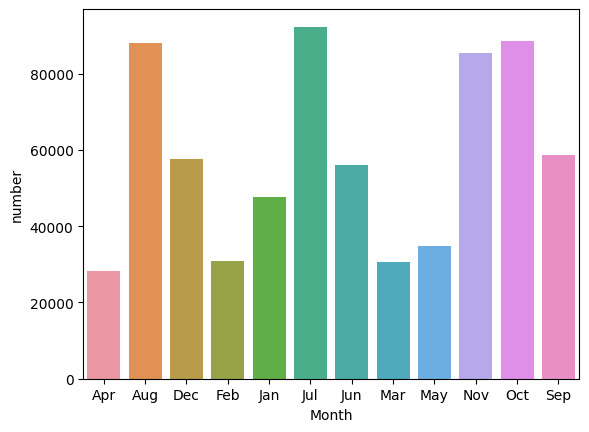

In [19]:
sns.barplot(data=dfm,x="month_eng",y='number')
plt.xlabel('Month')
plt.show()

11. In which year there was the most fires

In [20]:
df['Year'] = df['date'].dt.year

In [21]:
dfy = df.groupby('Year')['number'].sum().reset_index()
dfy

,Year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


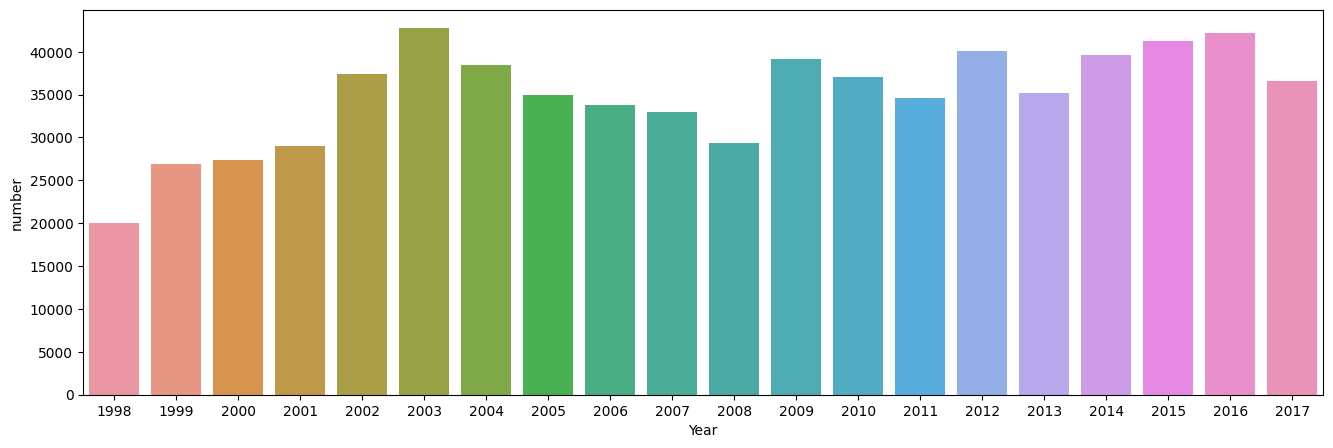

In [22]:
plt.figure(figsize=(16,5))
sns.barplot(data=dfy,x='Year',y='number')
plt.show()

12. In which state there was the most number of fires

In [23]:
dfs = df.groupby('state')['number'].sum().reset_index()
dfs

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


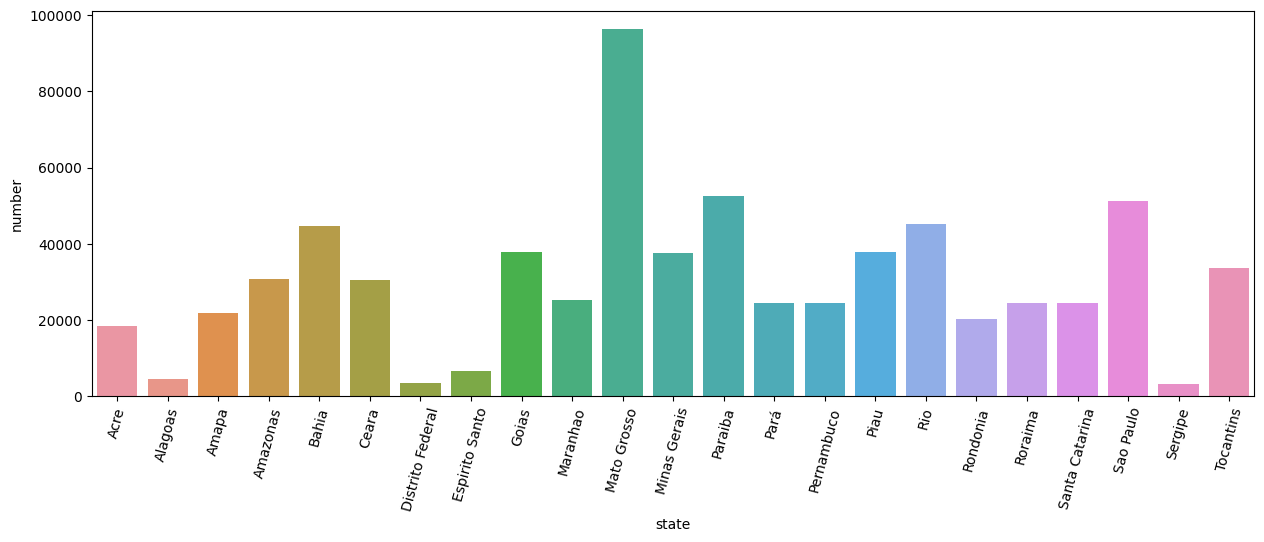

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=dfs,x='state',y='number')
plt.xticks(rotation=75)
plt.show()

13. Find the total fires were in the Amazonas

In [25]:
amazon = df[df['state']=='Amazonas']
amazon['number'].sum()

30650.129

14. Display the number of fires in the Amazonas per year

In [26]:
dfam = amazon.groupby('Year')['number'].sum().reset_index()
dfam

,Year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


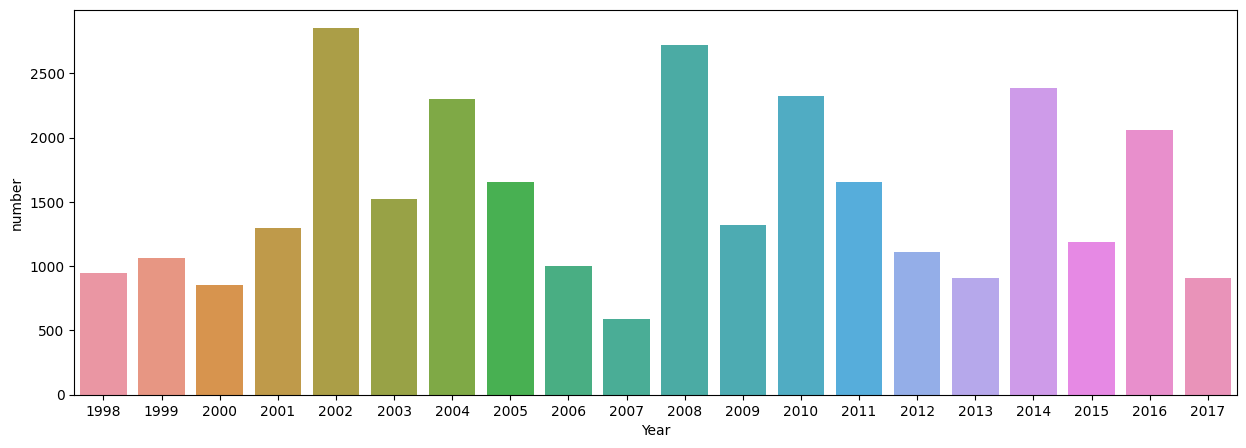

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=dfam,x='Year',y='number')
plt.show()

15. Display Number of Fires Were Reported In Amazonas (Day-Wise)


In [89]:
day = amazon.groupby(amazon['date'].dt.dayofweek)['number'].sum()
import calendar
day.index = [calendar.day_name[i] for i in range(0,7)]
day=pd.DataFrame(day.reset_index())
day.rename(columns={"index": "Day of week"}, inplace=True)

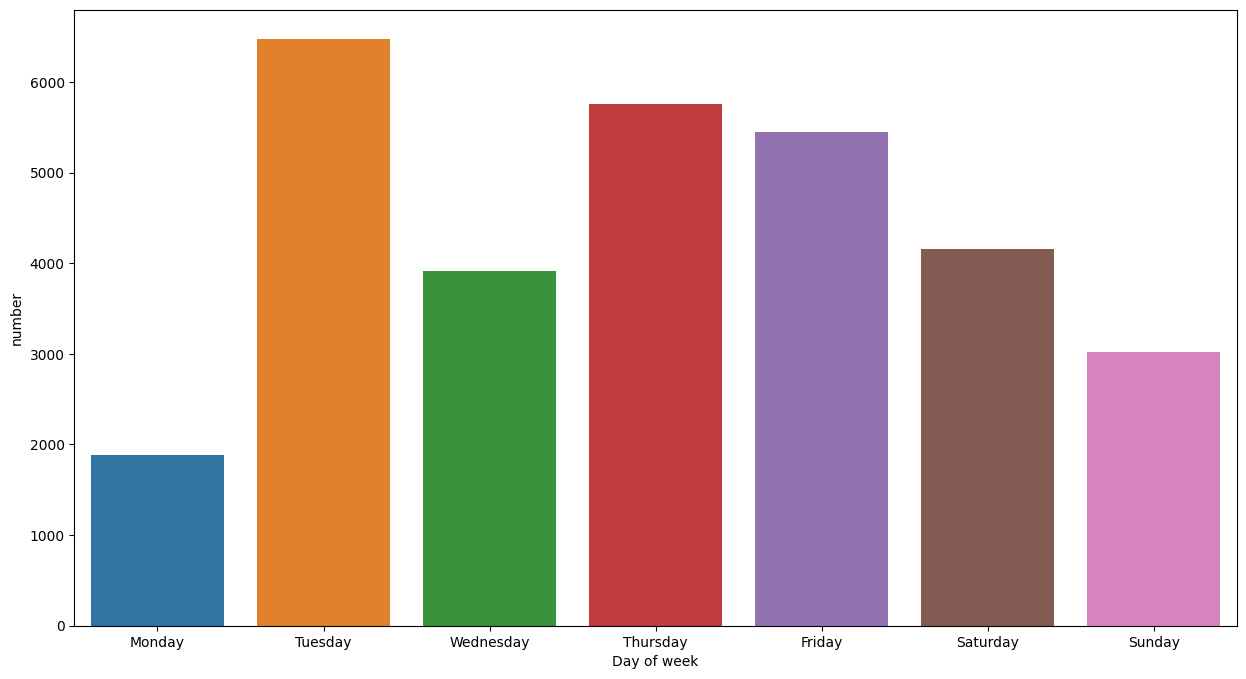

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(x='Day of week',y='number',data=day)
plt.show()

16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’


In [121]:
df2015 = df[df['Year']==2015].groupby('month_eng')['number'].sum().reset_index()

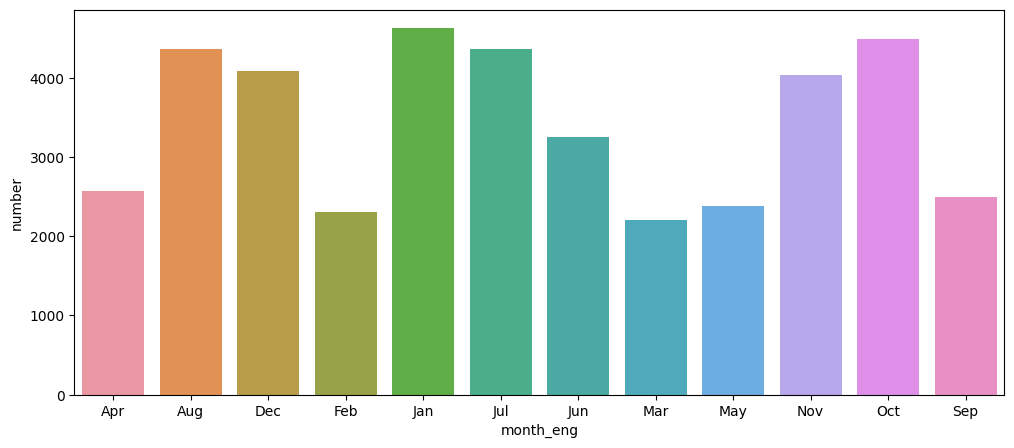

In [127]:
plt.figure(figsize=(12,5))
sns.barplot(x='month_eng',y='number',data=df2015)
plt.show()

17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [134]:
df_state = df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
df_state

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


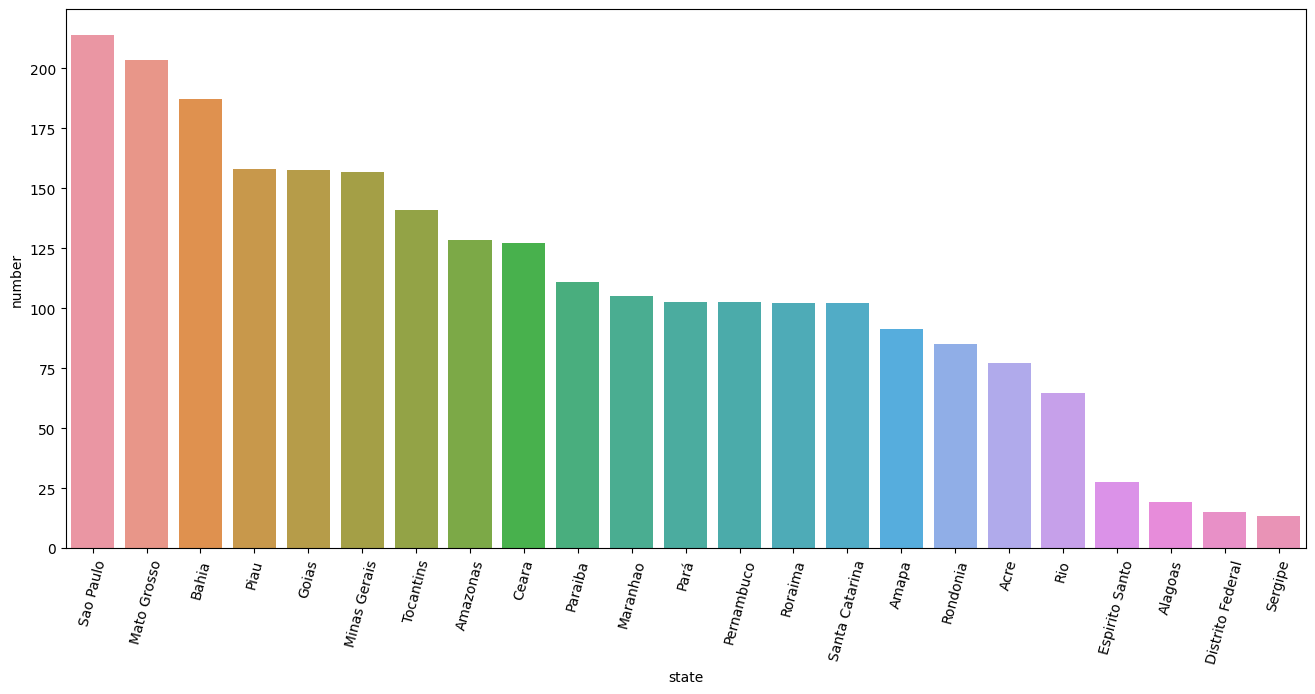

In [137]:
plt.figure(figsize=(16,7))
sns.barplot(data=df_state,x='state',y='number')
plt.xticks(rotation=75)
plt.show()

18. Find The State Names Where Fires Were Reported In 'dec' Month


In [141]:
df[df['month_eng']=='Dec']['state'].unique().tolist()

['Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Minas Gerais',
 'Pará',
 'Paraiba',
 'Pernambuco',
 'Piau',
 'Rio',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins']